In [25]:
#!pip install xgboost

  Using cached xgboost-1.6.1-py3-none-win_amd64.whl (125.4 MB)


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import datetime
import torchxrayvision as xrv
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import torch  
import torchvision
import torchxrayvision as xrv
import pylab
import torch.optim as optim
import torch.nn as nn
from pathlib import Path
from tqdm import tqdm
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)
from scipy.spatial import cKDTree
np.random.seed(123)
from math import *
import urllib, os
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential, Model
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, Input, concatenate

from sklearn.model_selection import train_test_split
import argparse
import locale

from keras.preprocessing.image import ImageDataGenerator
import itertools
from keras import regularizers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.models import load_model

In [2]:
# Getting images and reshaping
from keras.preprocessing.image import ImageDataGenerator
# change sample figure here
samples = 600
image_folder = 'D:\Documents\Masters\project\input_all'
image_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        image_folder, shuffle=True, class_mode='binary',
        target_size=(224, 224), batch_size=samples)

Found 6001 images belonging to 2 classes.


In [3]:
image_generator.samples 

6001

In [4]:
image_generator.class_indices

{'a_norm': 0, 'b_covid': 1}

In [5]:
images, labels = next(image_generator)
len(labels)
#print(labels)

600

In [6]:
# Getting the ordered list of filenames for the images
image_files = pd.Series(image_generator.filenames)
#image_files = image_files.str.split('/', expand=True)[1].str[:-4]
image_files = list(image_files)
len(image_files)

6001

In [7]:
# Using train_test_split to partition the training and testing images
(trainImagesX, testImagesX, y_train, y_test) = train_test_split(images,labels, test_size=0.25, random_state=42)

In [8]:
nsamples, nx, ny, nz = trainImagesX.shape
t2 = trainImagesX.reshape((nsamples,nx*ny*nz))

n_samples, n_x, n_y, n_z = testImagesX.shape
test2 = testImagesX.reshape((n_samples,n_x*n_y*n_z))

In [ ]:
### Using gridsearch to get best value of K
start = datetime.datetime.now()
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(t2, y_train)
end = datetime.datetime.now()
print("done in:", end-start)
#### Without PCA
print("Predicting Covid 19 images")
start = datetime.datetime.now()
y_pred = grid_search.predict(test2)
end = datetime.datetime.now()
print("done in:", end-start)
        
# print classification results
print(classification_report(y_test, y_pred))
# print confusion matrix
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred))

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
### Using gridsearch to get best kernel
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [42]:
#### KNN without PCA
start = datetime.datetime.now()
knn = KNeighborsClassifier()
knn.fit(t2, y_train)
end = datetime.datetime.now()
print("done in:", end-start)
#### Without PCA
print("Predicting Covid 19 images")
start = datetime.datetime.now()
y_pred = knn.predict(test2)
end = datetime.datetime.now()
print("done in:", end-start)
        
# print classification results
print(classification_report(y_test, y_pred))
# print confusion matrix
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred))



done in: 0:34:36.926824
Predicting Covid 19 images
done in: 0:27:27.498877
              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90       749
         1.0       0.87      0.94      0.91       751

    accuracy                           0.90      1500
   macro avg       0.91      0.90      0.90      1500
weighted avg       0.91      0.90      0.90      1500

Confusion Matrix is:
[[647 102]
 [ 44 707]]


In [43]:
#### SVM without PCA
start = datetime.datetime.now()
svm = SVC()
svm.fit(t2, y_train)
end = datetime.datetime.now()
print("done in:", end-start)
#### Without PCA
print("Predicting Covid 19 images")
start = datetime.datetime.now()
y_pred = svm.predict(test2)
end = datetime.datetime.now()
print("done in:", end-start)
        
# print classification results
print(classification_report(y_test, y_pred))
# print confusion matrix
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred))

done in: 0:36:05.596652
Predicting Covid 19 images
done in: 0:07:33.161821
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.90       749
         1.0       0.88      0.93      0.90       751

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500

Confusion Matrix is:
[[655  94]
 [ 55 696]]


In [44]:
## XGBOOST
from xgboost import XGBClassifier
start = datetime.datetime.now()
xgb=XGBClassifier()
xgb.fit(t2, y_train)
end = datetime.datetime.now()
print("done in:", end-start)
#### Without PCA
print("Predicting Covid 19 images")
start = datetime.datetime.now()
y_pred = xgb.predict(test2)
end = datetime.datetime.now()
print("done in:", end-start)
        
# print classification results
print(classification_report(y_test, y_pred))
# print confusion matrix
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred))

done in: 1:08:46.775455
Predicting Covid 19 images
done in: 0:00:54.651829
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       749
         1.0       0.95      0.95      0.95       751

    accuracy                           0.95      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.95      0.95      0.95      1500

Confusion Matrix is:
[[714  35]
 [ 35 716]]


In [45]:
### CNN without PCA
def create_cnn(width, height, depth, filters=(16, 32, 64), regularizer=None):
    """
    Creates a CNN with the given input dimension and filter numbers.
    Adapted from the function described here: https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/
    """
    # Initialize the input shape and channel dimension, where the number of channels is the last dimension
    inputShape = (height, width, depth)
    chanDim = -1
 
    # Define the model input
    inputs = Input(shape=inputShape)
 
    # Loop over the number of filters 
    for (i, f) in enumerate(filters):
        # If this is the first CONV layer then set the input appropriately
        if i == 0:
            x = inputs
 
        # Create loops of CONV => RELU => BN => POOL layers
        x = Conv2D(f, (3, 3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = MaxPooling2D(pool_size=(2, 2), name=f'feature_layer_{i}')(x)
        
    # Final layers - flatten the volume, then Fully-Connected => RELU => BN => DROPOUT
    x = Flatten()(x)
    x = Dense(16, kernel_regularizer=regularizer)(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = Dropout(0.5)(x)
 
    # Apply another fully-connected layer, this one to match the number of nodes coming out of the MLP
    x = Dense(4, kernel_regularizer=regularizer)(x)
    x = Activation("relu")(x)
 
    # Construct the CNN
    model = Model(inputs, x)
 
    # Return the CNN
    return model
def show_cf(y_true, y_pred, class_names=None, model_name=None):
    """Plots a confusion matrix"""
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()
def cnn_evaluation(model, history, train_images, train_labels, test_images, test_labels, class_names=None, model_name=None):
    """
    Evaluates the performance of a CNN with loss and accuracy plots, a confusion matrix and a classification report for the training and test sets.
    """
    train_acc = history.history['acc']
    val_acc = history.history['val_acc']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epch = range(1, len(train_acc) + 1)
    plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
    plt.plot(epch, val_acc, 'g', label='Validation acc')
    plt.title('Accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epch, train_loss, 'r.', label='Training loss')
    plt.plot(epch, val_loss, 'r', label='Validation loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    results_test = model.evaluate([test_images], y_test)
    print('Test Loss:', results_test[0])
    print('Test Accuracy:', results_test[1])
    
    y_train_pred = np.round(model.predict([train_images]))
    y_pred = np.round(model.predict([test_images]))
    
    show_cf(test_labels, y_pred, class_names=class_names, model_name=model_name)
    
    print(classification_report(train_labels, y_train_pred))
    print(classification_report(test_labels, y_pred))

Epoch 1/50
141/141 [==============================] - 179s 1s/step - loss: 9.4385 - acc: 0.7491 - val_loss: 4.3523 - val_acc: 0.5007
Epoch 2/50
141/141 [==============================] - 86s 608ms/step - loss: 2.9671 - acc: 0.8364 - val_loss: 3.0757 - val_acc: 0.7393
Epoch 3/50
141/141 [==============================] - 83s 592ms/step - loss: 2.9031 - acc: 0.8555 - val_loss: 4.6064 - val_acc: 0.7987
Epoch 4/50
141/141 [==============================] - 83s 591ms/step - loss: 3.2963 - acc: 0.8741 - val_loss: 2.8875 - val_acc: 0.8087
Epoch 5/50
141/141 [==============================] - 85s 600ms/step - loss: 2.5916 - acc: 0.8858 - val_loss: 2.9622 - val_acc: 0.7707
Epoch 6/50
141/141 [==============================] - 84s 593ms/step - loss: 2.1183 - acc: 0.9055 - val_loss: 2.7063 - val_acc: 0.8233
Epoch 7/50
141/141 [==============================] - 83s 590ms/step - loss: 2.1065 - acc: 0.9099 - val_loss: 1.4560 - val_acc: 0.9033
Epoch 8/50
141/141 [==============================] - 84s

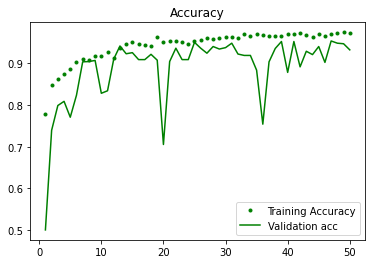

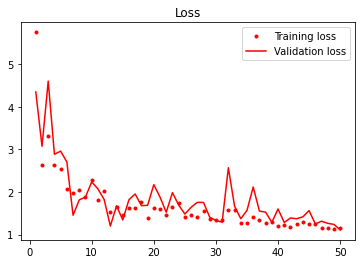

47/47 [==============================] - 7s 140ms/step - loss: 1.1110 - acc: 0.9320
Test Loss: 1.111047625541687
Test Accuracy: 0.9319999814033508
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      2251
         1.0       0.95      1.00      0.97      2249

    accuracy                           0.97      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.97      0.97      0.97      4500

              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93       749
         1.0       0.90      0.98      0.94       751

    accuracy                           0.93      1500
   macro avg       0.94      0.93      0.93      1500
weighted avg       0.94      0.93      0.93      1500



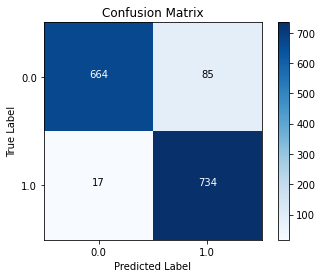

In [46]:
## Creating the CNN model
cnn1 = create_cnn(224, 224, 3, regularizer=regularizers.l1(0.005))
# The final fully-connected layer head will have two dense layers (one relu and one sigmoid)
x = Dense(4, activation="relu")(cnn1.output)
x = Dense(1, activation="sigmoid")(x)
model1 = Model(inputs=cnn1.input, outputs=x)
from tensorflow.keras.optimizers import *
start = datetime.datetime.now()

# compile the model 
# opt = Adam(lr=1e-3, decay=1e-3 / 200)
model1.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['acc'])
 
# train the model
model1_history = model1.fit([trainImagesX],y_train, validation_data=([testImagesX],y_test), epochs=50)
 
end = datetime.datetime.now()
print("Time taken to run:", end-start)
cnn_evaluation(model1, model1_history, trainImagesX,y_train,testImagesX[0:],y_test[0:],class_names=['a_non', 'b_cov'])

In [9]:
cnn1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 16)      64        
_________________________________________________________________
feature_layer_0 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
activation_1 (Activation)    (None, 112, 112, 32)      0     

In [14]:
print(train_x)

[[[[ 2.81777859e-01  1.05682783e+01  1.77246261e+00 ...  3.66921711e+00
     9.13943958e+00 -4.05490965e-01]
   [-4.22115594e-01  9.92519760e+00  1.10755980e+00 ...  3.28516674e+00
    -9.22374502e-02 -4.05490965e-01]
   [-2.44293809e-01  1.03674536e+01  2.48931855e-01 ...  3.29745340e+00
    -2.32222289e-01 -4.05490965e-01]
   ...
   [-4.42253292e-01  5.91075706e+00  1.29489064e-01 ...  2.89122486e+00
    -2.32222289e-01 -4.05490965e-01]
   [-4.42253292e-01  5.19642448e+00  5.20192146e-01 ...  3.15478849e+00
     3.37280345e+00 -4.05490965e-01]
   [ 3.07478786e+00  8.20917416e+00  4.89077473e+00 ...  6.75123167e+00
     1.89124336e+01 -3.55119020e-01]]

  [[-4.42253292e-01  1.48392839e+01  2.33594346e+00 ...  2.40931416e+00
     6.12218189e+00 -4.05490965e-01]
   [-4.42253292e-01  1.15866089e+01  1.22594380e+00 ...  1.45874822e+00
    -2.32222289e-01 -4.05490965e-01]
   [-4.42253292e-01  9.96812439e+00  1.58486342e+00 ...  1.64667356e+00
    -2.32222289e-01 -4.05490965e-01]
   ...
   

In [47]:
### CNN + KNN
from keras.utils import np_utils
start = datetime.datetime.now()
new_model=Model(inputs=cnn1.input,outputs=cnn1.get_layer('feature_layer_2').output)
#Let's obtain the Input Representations
train_x=new_model.predict(trainImagesX)
test_x=new_model.predict(testImagesX)
nsamples, nx, ny, nz = train_x.shape
t2 = train_x.reshape((nsamples,nx*ny*nz))
n_samples, n_x, n_y, n_z = test_x.shape
test2 = test_x.reshape((n_samples,n_x*n_y*n_z))
knn.fit(t2, y_train)
end = datetime.datetime.now()
print("done in:", end-start)
#### Without PCA
print("Predicting Covid 19 images")
start = datetime.datetime.now()
y_pred = knn.predict(test2)
end = datetime.datetime.now()
print("done in:", end-start)
        
# print classification results
print(classification_report(y_test, y_pred))
# print confusion matrix
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred))

done in: 4:21:18.120008
Predicting Covid 19 images
done in: 0:08:51.049851
              precision    recall  f1-score   support

         0.0       0.98      0.70      0.81       749
         1.0       0.77      0.98      0.86       751

    accuracy                           0.84      1500
   macro avg       0.87      0.84      0.84      1500
weighted avg       0.87      0.84      0.84      1500

Confusion Matrix is:
[[523 226]
 [ 12 739]]


In [48]:
### CNN + SVM
from keras.utils import np_utils
start = datetime.datetime.now()
new_model=Model(inputs=cnn1.input,outputs=cnn1.get_layer('feature_layer_2').output)
#Let's obtain the Input Representations
train_x=new_model.predict(trainImagesX)
test_x=new_model.predict(testImagesX)
nsamples, nx, ny, nz = train_x.shape
t2 = train_x.reshape((nsamples,nx*ny*nz))
n_samples, n_x, n_y, n_z = test_x.shape
test2 = test_x.reshape((n_samples,n_x*n_y*n_z))
svm = SVC()
svm.fit(t2, y_train)
end = datetime.datetime.now()
print("done in:", end-start)
#### Without PCA
print("Predicting Covid 19 images")
start = datetime.datetime.now()
y_pred = svm.predict(test2)
end = datetime.datetime.now()
print("done in:", end-start)
        
# print classification results
print(classification_report(y_test, y_pred))
# print confusion matrix
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred))

done in: 0:18:57.778484
Predicting Covid 19 images
done in: 0:01:22.022165
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       749
         1.0       0.96      0.96      0.96       751

    accuracy                           0.96      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.96      0.96      0.96      1500

Confusion Matrix is:
[[716  33]
 [ 29 722]]


In [49]:
### CNN + XGBoost
from keras.utils import np_utils
start = datetime.datetime.now()
new_model=Model(inputs=cnn1.input,outputs=cnn1.get_layer('feature_layer_2').output)
#Let's obtain the Input Representations
train_x=new_model.predict(trainImagesX)
test_x=new_model.predict(testImagesX)
nsamples, nx, ny, nz = train_x.shape
t2 = train_x.reshape((nsamples,nx*ny*nz))
n_samples, n_x, n_y, n_z = test_x.shape
test2 = test_x.reshape((n_samples,n_x*n_y*n_z))
xgb=XGBClassifier()
xgb.fit(t2, y_train)
end = datetime.datetime.now()
print("done in:", end-start)
#### Without PCA
print("Predicting Covid 19 images")
start = datetime.datetime.now()
y_pred = xgb.predict(test2)
end = datetime.datetime.now()
print("done in:", end-start)
        
# print classification results
print(classification_report(y_test, y_pred))
# print confusion matrix
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred))

done in: 0:05:37.067277
Predicting Covid 19 images
done in: 0:00:00.800433
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       749
         1.0       0.96      0.98      0.97       751

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500

Confusion Matrix is:
[[719  30]
 [ 18 733]]


In [31]:
### Feature Reduction Using PCA
t0 = datetime.datetime.now()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(t2)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(t2)
test_img = scaler.transform(test2)
pca = PCA(.95) # to mean that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained
pca.fit(train_img)
print("done in ", datetime.datetime.now() - t0)

t0 = datetime.datetime.now()
X_train_pca = pca.transform(train_img)
X_test_pca = pca.transform(test_img)
print("done in ", datetime.datetime.now() - t0)

done in  0:00:06.404481
done in  0:00:00.362032


In [32]:
#### KNN with PCA
start = datetime.datetime.now()
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
end = datetime.datetime.now()
print("done in:", end-start)
#### Without PCA
print("Predicting Covid 19 images")
start = datetime.datetime.now()
y_pred = knn.predict(X_test_pca)
end = datetime.datetime.now()
print("done in:", end-start)
        
# print classification results
print(classification_report(y_test, y_pred))
# print confusion matrix
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred))

done in: 0:00:00.006981
Predicting Covid 19 images
done in: 0:00:00.013005
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87        72
         1.0       0.89      0.86      0.88        78

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150

Confusion Matrix is:
[[64  8]
 [11 67]]


In [33]:
#### SVM with PCA
start = datetime.datetime.now()
svm = SVC()
svm.fit(X_train_pca, y_train)
end = datetime.datetime.now()
print("done in:", end-start)
#### Without PCA
print("Predicting Covid 19 images")
start = datetime.datetime.now()
y_pred = svm.predict(X_test_pca)
end = datetime.datetime.now()
print("done in:", end-start)
        
# print classification results
print(classification_report(y_test, y_pred))
# print confusion matrix
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred))

done in: 0:00:00.046171
Predicting Covid 19 images
done in: 0:00:00.005970
              precision    recall  f1-score   support

         0.0       0.95      0.79      0.86        72
         1.0       0.83      0.96      0.89        78

    accuracy                           0.88       150
   macro avg       0.89      0.88      0.88       150
weighted avg       0.89      0.88      0.88       150

Confusion Matrix is:
[[57 15]
 [ 3 75]]


In [34]:
## XGBOOST with pca
from xgboost import XGBClassifier
start = datetime.datetime.now()
xgb=XGBClassifier()
xgb.fit(X_train_pca, y_train)
end = datetime.datetime.now()
print("done in:", end-start)
#### Without PCA
print("Predicting Covid 19 images")
start = datetime.datetime.now()
y_pred = xgb.predict(X_test_pca)
end = datetime.datetime.now()
print("done in:", end-start)
        
# print classification results
print(classification_report(y_test, y_pred))
# print confusion matrix
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred))

done in: 0:00:00.194990
Predicting Covid 19 images
done in: 0:00:00.003989
              precision    recall  f1-score   support

         0.0       0.82      0.71      0.76        72
         1.0       0.76      0.86      0.81        78

    accuracy                           0.79       150
   macro avg       0.79      0.78      0.78       150
weighted avg       0.79      0.79      0.79       150

Confusion Matrix is:
[[51 21]
 [11 67]]


In [ ]:
## Feature Reduction Using PCA
n_components = 150

print(
    "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
)
t0 = time()
pca = PCA(.95) # to mean that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

component = 10
print("Training the model")
start = datetime.datetime.now()
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train_pca[:,:component], y_train)
end = datetime.datetime.now()
print("done in:", end-start)

print("Predicting people's names on the test set")
start = datetime.datetime.now()
y_pred = knn.predict(X_test_pca[:,:component])
end = datetime.datetime.now()
print("done in:", end-start)
        
# print classification results
print(classification_report(y_test, y_pred))
# print confusion matrix
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred))